a. Translasi Citra

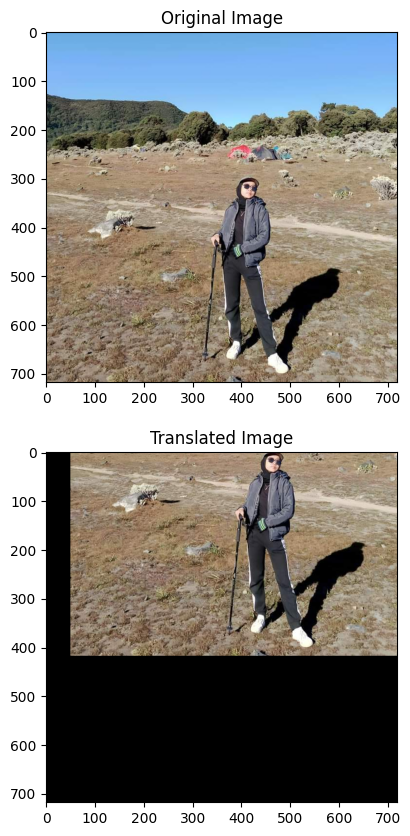

In [ ]:
import imageio.v3 as img
import numpy as np
import matplotlib.pyplot as plt  # Changed 'olt' to 'plt'

def translasi(image, shiftX, shiftY):
    imgTranslasi = np.roll(image, shift=shiftY, axis=0)  # geser vertikal
    imgTranslasi = np.roll(imgTranslasi, shift=shiftX, axis=1)  # geser horizontal

    # Mengisi bagian yang kosong dengan warna hitam (0)
    if shiftY > 0:
        imgTranslasi[:shiftY, :] = 0  # bagian atas jika geser ke bawah
    elif shiftY < 0:
        imgTranslasi[shiftY:, :] = 0  # bagian bawah jika geser ke atas
    if shiftX > 0:
        imgTranslasi[:, :shiftX] = 0  # bagian kiri jika geser ke kanan
    elif shiftX < 0:
        imgTranslasi[:, shiftX:] = 0  # bagian kanan jika geser ke kiri

    return imgTranslasi

# Load image (make sure to provide the correct path)
image = img.imread("/content/FB_IMG_1704121158389.jpg")

# Apply the translation function
imgResult = translasi(image, shiftX=50, shiftY=-300)

# Display the original and the translated images
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(2, 1, 2)
plt.imshow(imgResult)
plt.title('Translated Image')
plt.show()


b. Mirroring

In [ ]:
import numpy as np
import imageio as img
import matplotlib.pyplot as plt

path = 'D://'
image = img.imread(path)

height, width = image.shape[:2]
horizontal = np.zeros_like(image)
vertical = np.zeros_like(image)

for y in range(height):
  for x in range(width):
    horizontal[y, x] = image[y, width -1 -x]

for y in range(height):
  for x in range(width):
    vertical[y, x] = image[height - 1-y,x]

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.imshow(horizontal)

plt.subplot(1, 3, 3)
plt.imshow(vertical)

plt.show()

C. Rotasi Citra

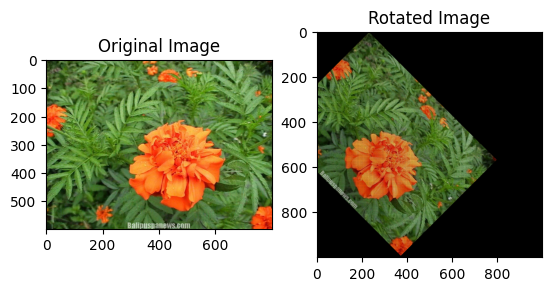

In [ ]:
import imageio.v2 as img  # Update to use the correct imageio version
import numpy as np
import matplotlib.pyplot as plt

def rotateImage(image, degree):
    radian_deg = np.radians(degree)
    cos_deg, sin_deg = np.cos(radian_deg), np.sin(radian_deg)

    height, width = image.shape[:2]
    max_dim = int(np.sqrt(height**2 + width**2))
    outputImage = np.zeros((max_dim, max_dim, 3), dtype=image.dtype)

    centerY, centerX = max_dim // 2, height // 2

    # Fix typo: change 'heigth' to 'height'
    for y in range(-height // 2, height // 2):
        for x in range(-width // 2, width // 2):
            newX = int(cos_deg * x - sin_deg * y) + centerX
            newY = int(sin_deg * x + cos_deg * y) + centerY

            if 0 <= newX < max_dim and 0 <= newY < max_dim:
                outputImage[newY, newX] = image[y + height // 2, x + width // 2]

    return outputImage

# Load the image with the correct imageio import
image = img.imread('/content/kembang-kenikir1.jpg')

# Rotate the image by 45 degrees
rotated_image = rotateImage(image, 45)

# Display the original and rotated images side by side
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title("Rotated Image")

plt.show()


d. Zooming

<ipython-input-13-6b9ebe5f5a75>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread('/content/pemandangan.jpg')


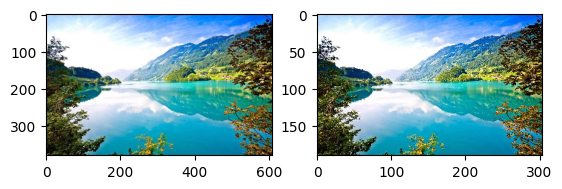

In [ ]:
import numpy as np
import imageio as img
import matplotlib.pyplot as plt

def zoomPlus(image, factor):
  height, width = image.shape[:2]
  new_height = int(height / factor)
  new_width = int(width / factor)
  imgZoom = np.zeros((new_height, new_width, 3), dtype=image.dtype)

  for y in range(new_height):
    for x in range(new_width):

      ori_y = int(y * factor)
      ori_x = int(x * factor)

      ori_y = min(ori_y, height -1)
      ori_x = min(ori_x, width -1)

      imgZoom[y, x] = image[ori_y, ori_x]

  return imgZoom

image = img.imread('/content/pemandangan.jpg')
skala = 2.0

imgZoom = zoomPlus(image, skala)
img.imwrite("/content/pemandangan.jpg",imgZoom)
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(imgZoom)
plt.show()
